<a href="https://colab.research.google.com/github/omkar1872/Titanic-Survived-Classification/blob/main/Titanic_Survived_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [299]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [300]:
df=pd.read_csv("/content/Titanic-Dataset (2).csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [301]:
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(891, 12)

In [302]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [303]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [304]:
df.drop(['PassengerId','Ticket','Name','Cabin'],axis=1,inplace=True)

In [305]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [306]:
df.dtypes

,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object


In [307]:

df['Age'].fillna(df['Age'].median(), inplace=True)


<ipython-input-307-63d4fb902a4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [308]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [309]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [310]:
# Fill missing Embarked values with the most frequent value (mode)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


<ipython-input-310-6e17f5e92921>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [311]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [312]:
df.dtypes

,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object


In [313]:
label=LabelEncoder()
df['Sex']=label.fit_transform(df['Sex'])

In [314]:
df['Embarked']=label.fit_transform(df['Embarked'])

In [315]:
df.dtypes

,0
Survived,int64
Pclass,int64
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,int64


In [316]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [317]:
scaler = StandardScaler()
df[['Age','Fare']] = scaler.fit_transform(df[['Age','Fare']])


In [318]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.565736,1,0,-0.502445,2
1,1,1,0,0.663861,1,0,0.786845,0
2,1,3,0,-0.258337,0,0,-0.488854,2
3,1,1,0,0.433312,1,0,0.420730,2
4,0,3,1,0.433312,0,0,-0.486337,2


In [319]:
import pandas as pd

# Assuming df is your Titanic DataFrame
print(df['Survived'].value_counts())
print("\nPercentage distribution:")
print(df['Survived'].value_counts(normalize=True) * 100)


Survived
0    549
1    342
Name: count, dtype: int64

Percentage distribution:
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


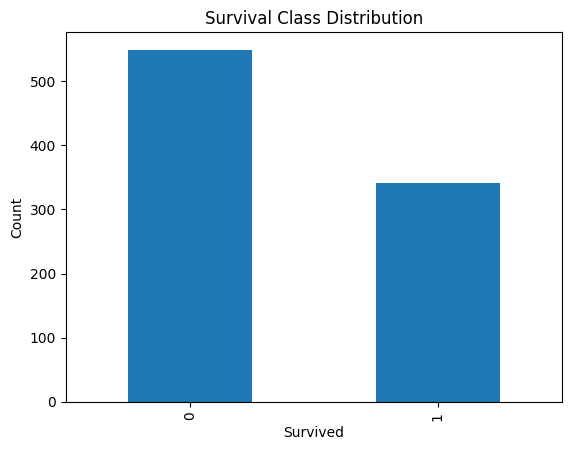

In [320]:
import matplotlib.pyplot as plt

df['Survived'].value_counts().plot(kind='bar')
plt.title('Survival Class Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


In [321]:
from imblearn.over_sampling import SMOTE

X = df.drop('Survived', axis=1)
y = df['Survived']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before balancing:", y.value_counts())
print("After balancing:", y_resampled.value_counts())


Before balancing: Survived
0    549
1    342
Name: count, dtype: int64
After balancing: Survived
0    549
1    549
Name: count, dtype: int64


In [322]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.565736,1,0,-0.502445,2
1,1,1,0,0.663861,1,0,0.786845,0
2,1,3,0,-0.258337,0,0,-0.488854,2
3,1,1,0,0.433312,1,0,0.420730,2
4,0,3,1,0.433312,0,0,-0.486337,2


In [323]:
X=df.drop('Survived',axis=1)
Y=df['Survived']

In [324]:
print(X.shape)
print(Y.shape)

(891, 7)
(891,)


In [325]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [326]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(712, 7)
(712,)
(179, 7)
(179,)


In [327]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train,Y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [328]:
# prediction
y_pred=model.predict(X_test)
print(y_pred)

[1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0
 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1
 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0
 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1]


In [329]:
# model evaluation
from sklearn.metrics import precision_score,recall_score
acc=accuracy_score(Y_test,y_pred)
print("the accuracy is:",acc)
pre=precision_score(Y_test,y_pred)
print("the precision is:",pre)
recal=recall_score(Y_test,y_pred)
print("the recall is:",recal)

the accuracy is: 0.8212290502793296
the precision is: 0.8133333333333334
the recall is: 0.7721518987341772


In [330]:
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

Accuracy: 0.8212290502793296
Confusion Matrix:
 [[86 14]
 [18 61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       100
           1       0.81      0.77      0.79        79

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179

